In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_excel(r"realistic_loan_risk.xlsx")

# Convert categorical column "Marital_Status" to numerical values
label_encoder = LabelEncoder()
df["Marital_Status"] = label_encoder.fit_transform(df["Marital_Status"])

# Features and target
X = df.drop(columns=["Risk_Level"])  # Independent variables
y = df["Risk_Level"]  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

print("80% of the data is used for training and 20% for testing.")


80% of the data is used for training and 20% for testing.


In [4]:
pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
Using cached numpy-2.2.4-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install transformers

  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached regex-2024.11.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 16.0 MB/s eta 0:00:00 0:00:01
Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl (173 kB)
Using cached regex-2024.11.6-cp312-cp312-macosx_11_0_arm64.whl (284 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.3 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
U

In [9]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl (11.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize model
model = RandomForestClassifier(n_estimators=1, random_state=42)
print(f"Initialized Model: {model}")

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"Model Accuracy : {accuracy * 100:.2f}%")
print(f"Model Precision: {precision * 100:.2f}%")
print(f"Model Recall   : {recall * 100:.2f}%")
print(f"Model F1 Score : {f1 * 100:.2f}%")


Initialized Model: RandomForestClassifier(n_estimators=1, random_state=42)
Model Accuracy : 67.25%
Model Precision: 67.84%
Model Recall   : 67.25%
Model F1 Score : 67.03%


In [12]:
import pickle

# Save the model as a pickle file
with open("loan_risk_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as 'loan_risk_model.pkl'")


Model saved successfully as 'loan_risk_model.pkl'


In [13]:
# Load the model
with open("loan_risk_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Example new loan applicant data (ensure the format matches X_train)
new_data = pd.DataFrame({
    "Age": [35],
    "Credit_Score": [720],
    "Debt_to_Income_Ratio": [0.2],
    "Income": [75000],
    "Loan_Amount": [25000],
    "Employment_Stability": [5],
    "Existing_Debts": [10000],
    "Previous_Defaults": [0],
    "Marital_Status": [label_encoder.transform(["Married"])[0]],  # Encode categorical data
    "Assets_Value": [30000],
    "Loan_Term": [60]
})

# Make prediction
predicted_risk = loaded_model.predict(new_data)
risk_labels = {0: "Low", 1: "Medium", 2: "High"}
print(f"Predicted Risk Level: {risk_labels[predicted_risk[0]]}")


Predicted Risk Level: Medium


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
print(f"Initialized Model: {knn_model}")

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"KNN Model Accuracy : {accuracy * 100:.2f}%")
print(f"KNN Model Precision: {precision * 100:.2f}%")
print(f"KNN Model Recall   : {recall * 100:.2f}%")
print(f"KNN Model F1 Score : {f1 * 100:.2f}%")


Initialized Model: KNeighborsClassifier()
KNN Model Accuracy : 74.50%
KNN Model Precision: 65.86%
KNN Model Recall   : 74.50%
KNN Model F1 Score : 69.30%


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Decision Tree model with max depth to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
print(f"Initialized Model: {dt_model}")

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"Decision Tree Model Accuracy : {accuracy * 100:.2f}%")
print(f"Decision Tree Precision      : {precision * 100:.2f}%")
print(f"Decision Tree Recall         : {recall * 100:.2f}%")
print(f"Decision Tree F1 Score       : {f1 * 100:.2f}%")


Initialized Model: DecisionTreeClassifier(max_depth=6, random_state=42)
Decision Tree Model Accuracy : 83.50%
Decision Tree Precision      : 84.38%
Decision Tree Recall         : 83.50%
Decision Tree F1 Score       : 83.47%


In [3]:
import pickle

# Save the model as a pickle file
with open("dt_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

print("Model saved successfully as 'dt_model.pkl'")


Model saved successfully as 'dt_model.pkl'


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)
print(f"Initialized Model: {svm_model}")

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"SVM Model Accuracy : {accuracy * 100:.2f}%")
print(f"SVM Model Precision: {precision * 100:.2f}%")
print(f"SVM Model Recall   : {recall * 100:.2f}%")
print(f"SVM Model F1 Score : {f1 * 100:.2f}%")


Initialized Model: SVC(kernel='linear', random_state=42)
SVM Model Accuracy : 64.00%
SVM Model Precision: 62.34%
SVM Model Recall   : 64.00%
SVM Model F1 Score : 62.97%


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
print(f"Initialized Model: {lr_model}")

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"Logistic Regression Accuracy : {accuracy * 100:.2f}%")
print(f"Logistic Regression Precision: {precision * 100:.2f}%")
print(f"Logistic Regression Recall   : {recall * 100:.2f}%")
print(f"Logistic Regression F1 Score : {f1 * 100:.2f}%")


Initialized Model: LogisticRegression(max_iter=1000, random_state=42)
Logistic Regression Accuracy : 78.25%
Logistic Regression Precision: 62.28%
Logistic Regression Recall   : 78.25%
Logistic Regression F1 Score : 69.36%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Naive Bayes model
nb_model = GaussianNB()
print(f"Initialized Model: {nb_model}")

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"Naive Bayes Accuracy : {accuracy * 100:.2f}%")
print(f"Naive Bayes Precision: {precision * 100:.2f}%")
print(f"Naive Bayes Recall   : {recall * 100:.2f}%")
print(f"Naive Bayes F1 Score : {f1 * 100:.2f}%")


Initialized Model: GaussianNB()
Naive Bayes Accuracy : 75.00%
Naive Bayes Precision: 77.14%
Naive Bayes Recall   : 75.00%
Naive Bayes F1 Score : 74.12%


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
print(f"Initialized Model: {ada_model}")

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print(f"AdaBoost Accuracy : {accuracy * 100:.2f}%")
print(f"AdaBoost Precision: {precision * 100:.2f}%")
print(f"AdaBoost Recall   : {recall * 100:.2f}%")
print(f"AdaBoost F1 Score : {f1 * 100:.2f}%")


Initialized Model: AdaBoostClassifier(n_estimators=100, random_state=42)
AdaBoost Accuracy : 79.00%
AdaBoost Precision: 62.41%
AdaBoost Recall   : 79.00%
AdaBoost F1 Score : 69.73%


In [3]:
pip install tensorflow


  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 15.1 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
Using cached grpcio-1.71.0-cp312-cp312-maco

In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])
print(f"Initialized Model: {model}")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Threshold for binary classification

# Evaluate metrics using sklearn
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print("Multi Layer Perceptron (MLP) Model Evaluation:")
print(f"MLP Model Accuracy : {accuracy * 100:.2f}%")
print(f"MLP Model Precision: {precision * 100:.2f}%")
print(f"MLP Model Recall   : {recall * 100:.2f}%")
print(f"MLP Model F1 Score : {f1 * 100:.2f}%")


Initialized Model: <Sequential name=sequential_2, built=True>
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1053 - loss: 3180.3813 - val_accuracy: 0.1625 - val_loss: -5401.1221
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1322 - loss: -5495.2988 - val_accuracy: 0.1650 - val_loss: -12434.9873
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1155 - loss: -12011.8779 - val_accuracy: 0.1650 - val_loss: -19493.5684
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1426 - loss: -17681.8008 - val_accuracy: 0.1650 - val_loss: -26265.0020
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1322 - loss: -22806.8262 - val_accuracy: 0.1650 - val_loss: -33294.5156
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1207 - loss: -28946.4727 - val_accuracy: 0.1650 - val_loss: -41023.2617
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1051 - loss: -38403.5938 - val_accuracy: 0.1650 - val_loss: -49380.3867
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1332 - loss: -

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_excel(r"realistic_loan_risk.xlsx")  

# One-Hot Encode categorical column
data = pd.get_dummies(data, columns=["Marital_Status"])

# Separate features and target
X = data.drop(columns=["Risk_Level"]).values
y = data["Risk_Level"].values  # Assuming target is 0, 1, 2 for risk levels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for Conv1D (samples, features, 1 channel)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define 1D CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 classes for multi-class classification
])

# Print model summary
print("Initialized 1D CNN Model:")
model.summary()

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with full progress shown (not just dots)
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
results = model.evaluate(X_test, y_test)
accuracy = results[1]
print(f"\n1D CNN Test Accuracy: {accuracy * 100:.2f}%")

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation summary
print("\n=== Final Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("======================================")


Initialized 1D CNN Model:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 5, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,819 (57.89 KB)

 Trainable params: 14,819 (57.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6772 - loss: 0.8771 - val_accuracy: 0.8100 - val_loss: 0.5854
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7737 - loss: 0.6711 - val_accuracy: 0.8100 - val_loss: 0.5257
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.5596 - val_accuracy: 0.8100 - val_loss: 0.5076
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.5294 - val_accuracy: 0.8400 - val_loss: 0.4487
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.4994 - val_accuracy: 0.8800 - val_loss: 0.4140
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4341 - val_accuracy: 0.8200 - val_loss: 0.4025
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8485 - loss: 0.4176 - val_accuracy: 0.8500 - val_loss: 0.3609
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3408 - val_accuracy: 0.8600 - val_loss:

In [17]:
# Print evaluation summary
print("1D CNN Model Evaluation Summary: 'for above snippet'")
print("\n=== Final Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("======================================")


1D CNN Model Evaluation Summary: 'for above snippet'

=== Final Model Evaluation Summary ===
Accuracy : 91.00%
Precision: 92.37%
Recall   : 91.00%
F1 Score : 91.40%


In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_excel(r"realistic_loan_risk.xlsx")  

# One-Hot Encode categorical column
data = pd.get_dummies(data, columns=["Marital_Status"])

# Separate features and target
X = data.drop(columns=["Risk_Level"]).values
y = data["Risk_Level"].values  # Assuming target is 0, 1, 2 for risk levels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for RNN: (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define RNN model
model = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])),
    keras.layers.SimpleRNN(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 classes
])

# Print model summary
print("Initialized RNN Model:")
model.summary()

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train with full output
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nRNN Test Accuracy: {accuracy * 100:.2f}%")

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Final Summary Print
print("\n=== Final RNN Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("==========================================")


Initialized RNN Model:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 64)          │         5,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,467 (40.89 KB)

 Trainable params: 10,467 (40.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.8897 - val_accuracy: 0.8100 - val_loss: 0.5570
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.5710 - val_accuracy: 0.8100 - val_loss: 0.4939
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.5051 - val_accuracy: 0.8100 - val_loss: 0.4558
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4348 - val_accuracy: 0.8300 - val_loss: 0.4306
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4767 - val_accuracy: 0.8200 - val_loss: 0.3959
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4104 - val_accuracy: 0.8300 - val_loss: 0.3780
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.3601 - val_accuracy: 0.8300 - val_loss: 0.3592
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3075 - val_accuracy: 0.8300 - val_loss:

In [20]:
# Final Summary Print
print("\n=== Final RNN Model Evaluation Summary === 'for above snippet'")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("==========================================")


=== Final RNN Model Evaluation Summary === 'for above snippet'
Accuracy : 89.00%
Precision: 89.23%
Recall   : 89.00%
F1 Score : 89.07%


In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_excel(r"realistic_loan_risk.xlsx")  

# Convert categorical column using One-Hot Encoding
data = pd.get_dummies(data, columns=["Marital_Status"])

# Separate features and target
X = data.drop(columns=["Risk_Level"]).values  
y = data["Risk_Level"].values  

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define FNN model
def create_fnn():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(3, activation='softmax')  # 3 classes
    ])
    return model

# Initialize model
fnn_model = create_fnn()
print("Initialized FNN Model:")
fnn_model.summary()

# Compile
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train with full verbose output
fnn_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate
loss, accuracy = fnn_model.evaluate(X_test, y_test)
print(f"\nFNN Test Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred_probs = fnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Final Summary
print("\n=== Final FNN Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("==========================================")


Initialized FNN Model:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,355 (48.26 KB)

 Trainable params: 12,355 (48.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5828 - loss: 0.9263 - val_accuracy: 0.8100 - val_loss: 0.5433
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7552 - loss: 0.6043 - val_accuracy: 0.8100 - val_loss: 0.4875
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7926 - loss: 0.4740 - val_accuracy: 0.8100 - val_loss: 0.4438
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.3826 - val_accuracy: 0.8100 - val_loss: 0.4218
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8566 - loss: 0.3791 - val_accuracy: 0.8100 - val_loss: 0.3940
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3399 - val_accuracy: 0.8000 - val_loss: 0.3779
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8995 - loss: 0.3090 - val_accuracy: 0.8100 - val_loss: 0.3499
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.2611 - val_accuracy: 0.8100 - val_loss:

In [22]:
# Final Summary
print("\n=== Final FNN Model Evaluation Summary ==='for above snippet'")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("==========================================")


=== Final FNN Model Evaluation Summary ==='for above snippet'
Accuracy : 89.00%
Precision: 89.29%
Recall   : 89.00%
F1 Score : 89.13%


In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_excel(r"realistic_loan_risk.xlsx")  

# One-Hot Encode
data = pd.get_dummies(data, columns=["Marital_Status"])

# Separate features and target
X = data.drop(columns=["Risk_Level"]).values  
y = data["Risk_Level"].values  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN
X_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define Shallow CNN model
def create_shallow_cnn():
    model = keras.Sequential([
        keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(3, activation='softmax')  # 3 classes
    ])
    return model

# Initialize and print model
shallow_cnn_model = create_shallow_cnn()
print("Initialized Shallow CNN Model:")
shallow_cnn_model.summary()

# Compile
shallow_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
shallow_cnn_model.fit(X_cnn, y_train, epochs=20, batch_size=16, validation_data=(X_test_cnn, y_test), verbose=1)

# Evaluate
loss, accuracy = shallow_cnn_model.evaluate(X_test_cnn, y_test)
print(f"\nShallow CNN Test Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred_probs = shallow_cnn_model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Final Summary
print("\n=== Final Shallow CNN Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("===============================================")


Initialized Shallow CNN Model:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 13, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,371 (24.89 KB)

 Trainable params: 6,371 (24.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5870 - loss: 0.9175 - val_accuracy: 0.8100 - val_loss: 0.5825
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7416 - loss: 0.7430 - val_accuracy: 0.8100 - val_loss: 0.5324
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7886 - loss: 0.5709 - val_accuracy: 0.8100 - val_loss: 0.5044
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7236 - loss: 0.6393 - val_accuracy: 0.8100 - val_loss: 0.4834
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4837 - val_accuracy: 0.8200 - val_loss: 0.4788
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7844 - loss: 0.4797 - val_accuracy: 0.8100 - val_loss: 0.4445
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - loss: 0.4588 - val_accuracy: 0.8100 - val_loss: 0.4377
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4402 - val_accuracy: 0.8300 - val_loss:

In [25]:
# Final Summary
print("\n=== Final Shallow CNN Model Evaluation Summary ==='for above snippet'")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("===============================================")



=== Final Shallow CNN Model Evaluation Summary ==='for above snippet'
Accuracy : 86.00%
Precision: 84.83%
Recall   : 86.00%
F1 Score : 84.93%


In [28]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = pd.read_excel(r"realistic_loan_risk.xlsx")  

# One-hot encode categorical column
data = pd.get_dummies(data, columns=["Marital_Status"])

# Split features and target
X = data.drop(columns=["Risk_Level"]).values
y = data["Risk_Level"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM: (samples, timesteps=1, features)
X_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define LSTM model
def create_lstm():
    model = keras.Sequential([
        keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_rnn.shape[2])),
        keras.layers.LSTM(32, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(3, activation='softmax')  
    ])
    return model

# Compile and train
lstm_model = create_lstm()
print("Initialized LSTM Model:")
lstm_model.summary()

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_rnn, y_train, epochs=20, batch_size=16, validation_data=(X_test_rnn, y_test), verbose=1)

# Evaluate
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print(f"\nLSTM Test Accuracy: {accuracy * 100:.2f}%")

# Predict and calculate metrics
y_pred_probs = lstm_model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print final metrics
print("\n=== Final LSTM Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("===========================================")


Initialized LSTM Model:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,947 (136.51 KB)

 Trainable params: 34,947 (136.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6869 - loss: 1.0697 - val_accuracy: 0.8100 - val_loss: 0.9506
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.8999 - val_accuracy: 0.8100 - val_loss: 0.6734
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.6456 - val_accuracy: 0.8100 - val_loss: 0.5340
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7590 - loss: 0.5967 - val_accuracy: 0.8100 - val_loss: 0.4903
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.6041 - val_accuracy: 0.8100 - val_loss: 0.4622
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4515 - val_accuracy: 0.8100 - val_loss: 0.4371
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.4878 - val_accuracy: 0.8100 - val_loss: 0.4173
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.4100 - val_accuracy: 0.8200 - val_loss:

In [29]:
# Print final metrics
print("\n=== Final LSTM Model Evaluation Summary ==='for above snippet'")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("===========================================")


=== Final LSTM Model Evaluation Summary ==='for above snippet'
Accuracy : 90.00%
Precision: 90.00%
Recall   : 90.00%
F1 Score : 90.00%


In [30]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = pd.read_excel("realistic_loan_risk.xlsx")  # Just file name

# One-hot encode categorical column
data = pd.get_dummies(data, columns=["Marital_Status"])

# Split features and target
X = data.drop(columns=["Risk_Level"]).values
y = data["Risk_Level"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM/BiLSTM: (samples, timesteps=1, features)
X_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define BiLSTM model
def create_bilstm():
    model = keras.Sequential([
        keras.layers.Bidirectional(keras.layers.LSTM(64, activation='relu', return_sequences=True), input_shape=(1, X_rnn.shape[2])),
        keras.layers.Bidirectional(keras.layers.LSTM(32, activation='relu')),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(3, activation='softmax')  
    ])
    return model

# Compile and train
bilstm_model = create_bilstm()
print("Initialized BiLSTM Model:")
bilstm_model.summary()

bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_rnn, y_train, epochs=20, batch_size=16, validation_data=(X_test_rnn, y_test), verbose=1)

# Evaluate
loss, accuracy = bilstm_model.evaluate(X_test_rnn, y_test)
print(f"\nBiLSTM Test Accuracy: {accuracy * 100:.2f}%")

# Predict and calculate metrics
y_pred_probs = bilstm_model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Final Summary
print("\n=== Final BiLSTM Model Evaluation Summary ===")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("=============================================")


Initialized BiLSTM Model:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 128)         │        40,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,019 (336.01 KB)

 Trainable params: 86,019 (336.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6754 - loss: 1.0670 - val_accuracy: 0.8100 - val_loss: 0.9114
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7635 - loss: 0.8423 - val_accuracy: 0.8100 - val_loss: 0.5356
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.6067 - val_accuracy: 0.8100 - val_loss: 0.4721
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.5068 - val_accuracy: 0.8100 - val_loss: 0.4415
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4576 - val_accuracy: 0.8100 - val_loss: 0.4164
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.4699 - val_accuracy: 0.8100 - val_loss: 0.3942
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.3720 - val_accuracy: 0.8100 - val_loss: 0.3763
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.3503 - val_accuracy: 0.8100 - val_loss

In [31]:
# Final Summary
print("\n=== Final BiLSTM Model Evaluation Summary ==='for above snippet'")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall   : {recall * 100:.2f}%")
print(f"F1 Score : {f1 * 100:.2f}%")
print("=============================================")


=== Final BiLSTM Model Evaluation Summary ==='for above snippet'
Accuracy : 91.00%
Precision: 90.52%
Recall   : 91.00%
F1 Score : 90.62%


In [33]:
df.head()

,Age,Credit_Score,Debt_to_Income_Ratio,Income,Loan_Amount,Employment_Stability,Existing_Debts,Previous_Defaults,Marital_Status,Assets_Value,Loan_Term,Risk_Level
0,60,759,0.14,113624,23076,14,7075,0,3,78493,36,0
1,50,790,0.37,63130,47650,19,12412,3,0,57198,48,2
2,36,780,0.39,81756,16012,22,30365,0,2,48395,12,2
3,64,645,0.47,56292,17151,24,9230,3,1,29031,24,2
4,29,701,0.32,116206,38211,13,13002,0,0,80542,24,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   500 non-null    int64  
 1   Credit_Score          500 non-null    int64  
 2   Debt_to_Income_Ratio  500 non-null    float64
 3   Income                500 non-null    int64  
 4   Loan_Amount           500 non-null    int64  
 5   Employment_Stability  500 non-null    int64  
 6   Existing_Debts        500 non-null    int64  
 7   Previous_Defaults     500 non-null    int64  
 8   Marital_Status        500 non-null    int32  
 9   Assets_Value          500 non-null    int64  
 10  Loan_Term             500 non-null    int64  
 11  Risk_Level            500 non-null    int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 45.1 KB


In [32]:
df.isnull()

,Age,Credit_Score,Debt_to_Income_Ratio,Income,Loan_Amount,Employment_Stability,Existing_Debts,Previous_Defaults,Marital_Status,Assets_Value,Loan_Term,Risk_Level
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.describe()

,Age,Credit_Score,Debt_to_Income_Ratio,Income,Loan_Amount,Employment_Stability,Existing_Debts,Previous_Defaults,Marital_Status,Assets_Value,Loan_Term,Risk_Level
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,43.506000,674.688000,0.348320,75041.458000,31453.192000,15.326000,20312.030000,0.742000,1.464000,54433.944000,49.704000,1.726000
std,12.368505,72.303764,0.145068,25894.803052,11403.752094,8.458298,10905.348043,1.101755,1.093204,27246.664384,24.173231,0.561743
min,22.000000,550.000000,0.100000,30281.000000,10145.000000,1.000000,2138.000000,0.000000,0.000000,5203.000000,12.000000,0.000000
25%,33.000000,610.000000,0.220000,54967.250000,21018.500000,8.000000,10769.250000,0.000000,1.000000,30507.500000,24.000000,2.000000
50%,45.000000,676.000000,0.350000,74653.500000,33253.000000,16.000000,19590.000000,0.000000,1.000000,54322.500000,48.000000,2.000000
75%,54.000000,738.250000,0.470000,98766.250000,41176.000000,23.000000,29991.750000,1.000000,2.000000,78523.750000,72.000000,2.000000
max,64.000000,799.000000,0.600000,119899.000000,49933.000000,29.000000,39822.000000,4.000000,3.000000,99835.000000,84.000000,2.000000


In [24]:
df.isnull().sum()

Age                     0
Credit_Score            0
Debt_to_Income_Ratio    0
Income                  0
Loan_Amount             0
Employment_Stability    0
Existing_Debts          0
Previous_Defaults       0
Marital_Status          0
Assets_Value            0
Loan_Term               0
Risk_Level              0
dtype: int64

In [25]:
df.shape

(500, 12)

C:\Users\chand\AppData\Local\Temp\ipykernel_15900\2880372339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Risk_Level', y='Credit_Score', data=df, palette='viridis', inner='quartile')


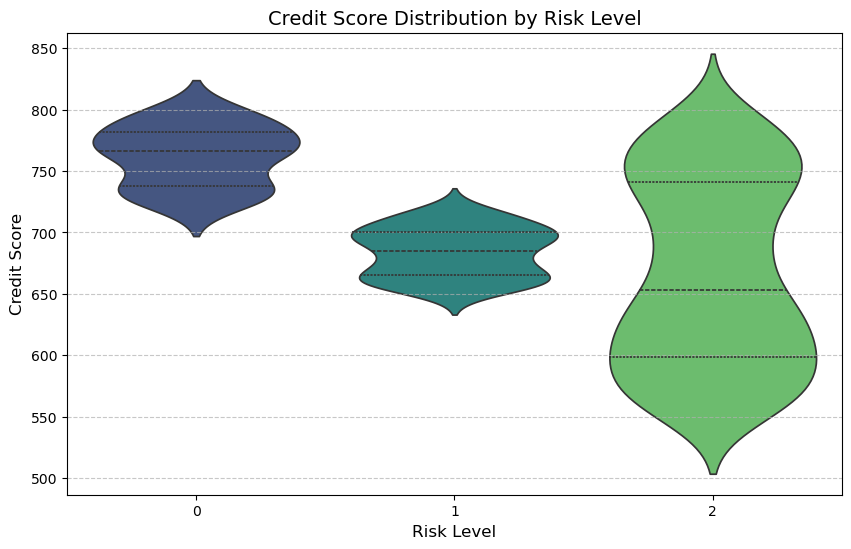

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.violinplot(x='Risk_Level', y='Credit_Score', data=df, palette='viridis', inner='quartile')
plt.title('Credit Score Distribution by Risk Level', fontsize=14)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

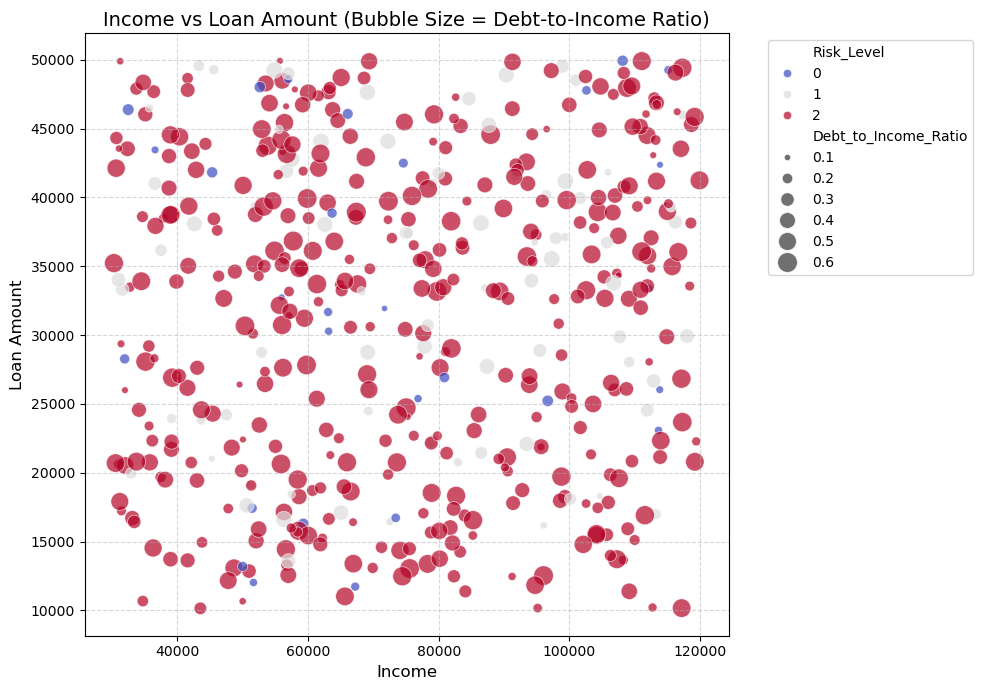

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Income', y='Loan_Amount', data=df, 
                hue='Risk_Level', size='Debt_to_Income_Ratio',
                palette='coolwarm', sizes=(20, 200), alpha=0.7)
plt.title('Income vs Loan Amount (Bubble Size = Debt-to-Income Ratio)', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

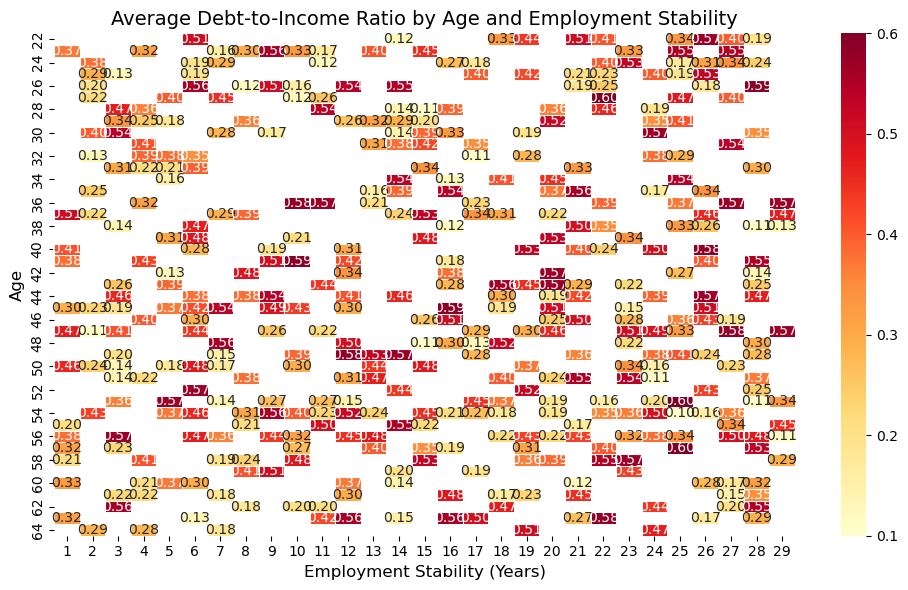

In [28]:
plt.figure(figsize=(10,6))
pivot_df = df.pivot_table(index='Age', columns='Employment_Stability', 
                          values='Debt_to_Income_Ratio', aggfunc='mean')
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Debt-to-Income Ratio by Age and Employment Stability', fontsize=14)
plt.xlabel('Employment Stability (Years)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

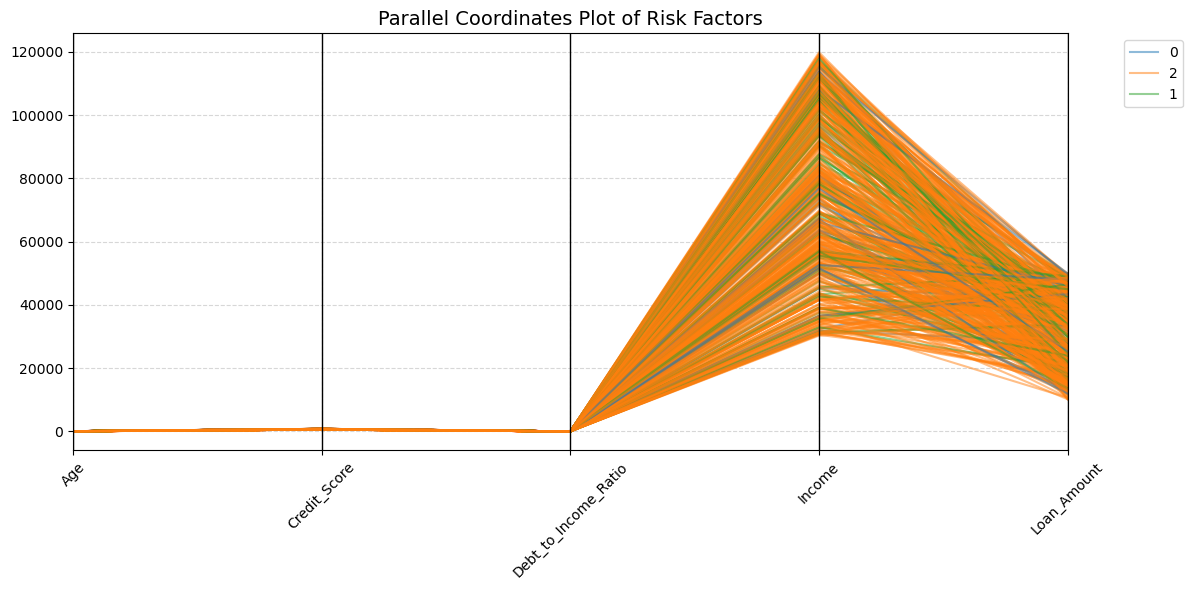

In [29]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,6))
parallel_cols = ['Age', 'Credit_Score', 'Debt_to_Income_Ratio', 'Income', 'Loan_Amount', 'Risk_Level']
parallel_df = df[parallel_cols].copy()
parallel_df['Risk_Level'] = parallel_df['Risk_Level'].astype(str)  # Convert to categorical

parallel_coordinates(parallel_df, 'Risk_Level', color=['#1f77b4','#ff7f0e','#2ca02c'], alpha=0.5)
plt.title('Parallel Coordinates Plot of Risk Factors', fontsize=14)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

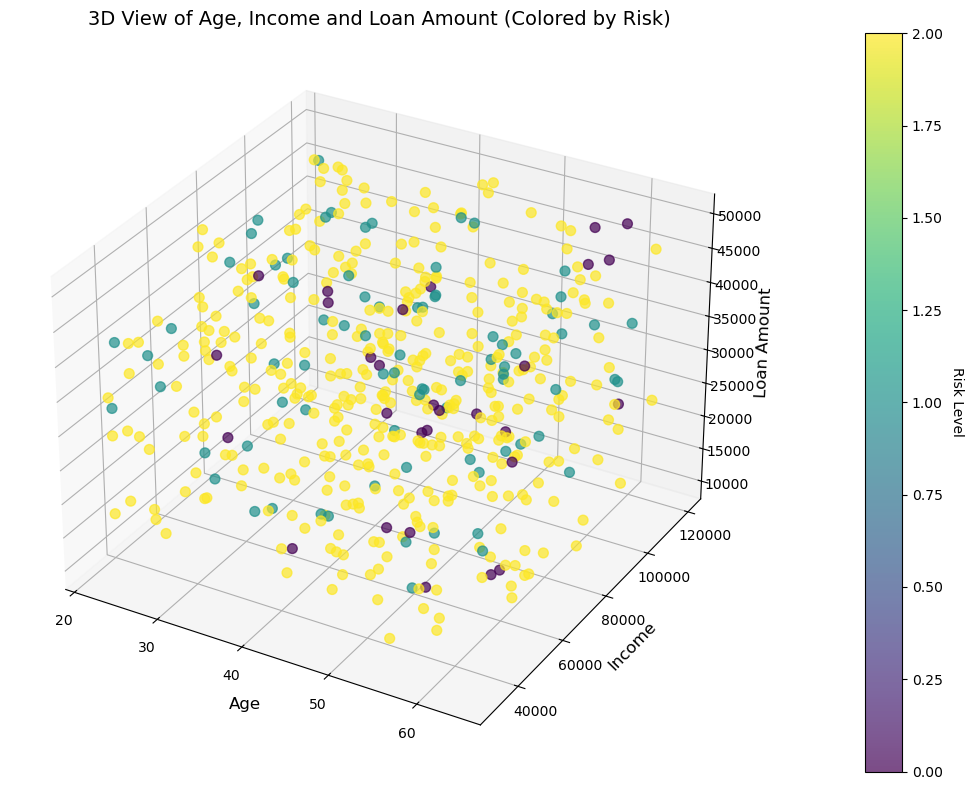

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Income'], df['Loan_Amount'], 
                     c=df['Risk_Level'], cmap='viridis', s=50, alpha=0.7)

ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Income', fontsize=12)
ax.set_zlabel('Loan Amount', fontsize=12)
ax.set_title('3D View of Age, Income and Loan Amount (Colored by Risk)', fontsize=14)

colorbar = fig.colorbar(scatter, pad=0.1)
colorbar.set_label('Risk Level', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

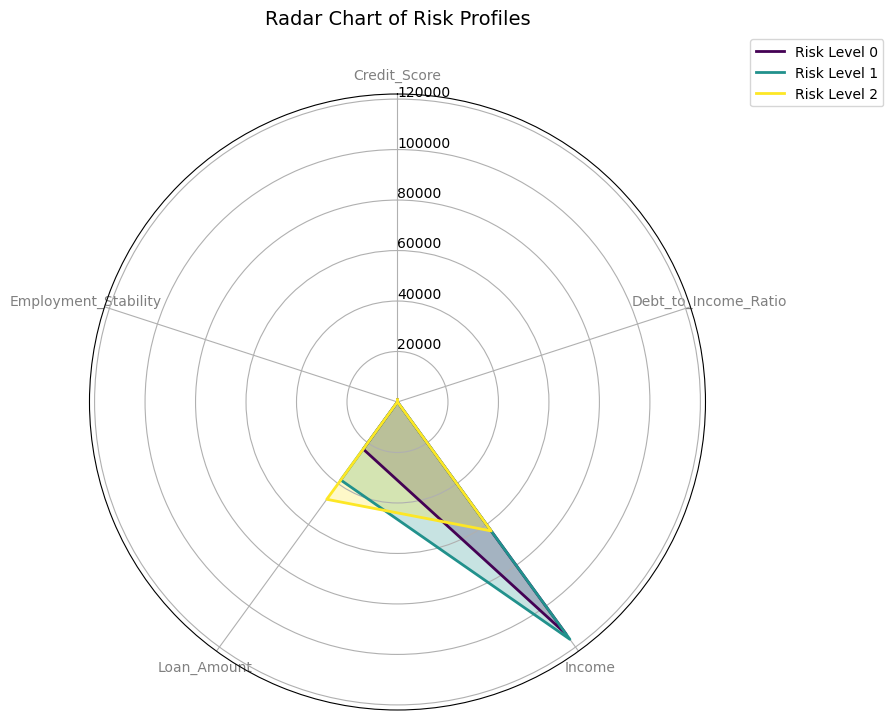

In [31]:
import numpy as np

def create_radar_chart(ax, angles, values, color, label):
    ax.plot(angles, values, color=color, linewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.25)

categories = ['Credit_Score','Debt_to_Income_Ratio','Income','Loan_Amount','Employment_Stability']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(0)

for i in range(3):  # Plot one example from each risk level
    sample = df[df['Risk_Level']==i].iloc[0]
    values = sample[categories].values.flatten().tolist()
    values += values[:1]
    create_radar_chart(ax, angles, values, plt.cm.viridis(i/2), f'Risk Level {i}')

plt.title('Radar Chart of Risk Profiles', y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [34]:
import pandas as pd

# Load your data (sample or actual)
df = pd.read_excel("realistic_loan_risk.xlsx")

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Print correlation matrix
print("=== Correlation Matrix ===")
print(correlation_matrix)


=== Correlation Matrix ===
                           Age  Credit_Score  Debt_to_Income_Ratio    Income  \
Age                   1.000000      0.037548             -0.018088 -0.061030   
Credit_Score          0.037548      1.000000              0.053043 -0.031864   
Debt_to_Income_Ratio -0.018088      0.053043              1.000000  0.003082   
Income               -0.061030     -0.031864              0.003082  1.000000   
Loan_Amount          -0.025510      0.003448              0.030155  0.060689   
Employment_Stability  0.019453     -0.020972              0.082876  0.057371   
Existing_Debts       -0.026760     -0.061189              0.029362 -0.012475   
Previous_Defaults    -0.009225     -0.019327             -0.055629 -0.029682   
Assets_Value         -0.045820      0.003085              0.016959  0.123358   
Loan_Term            -0.000235      0.054240             -0.032099 -0.030388   
Risk_Level           -0.077496     -0.285420              0.392234 -0.003479   

            

In [37]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11

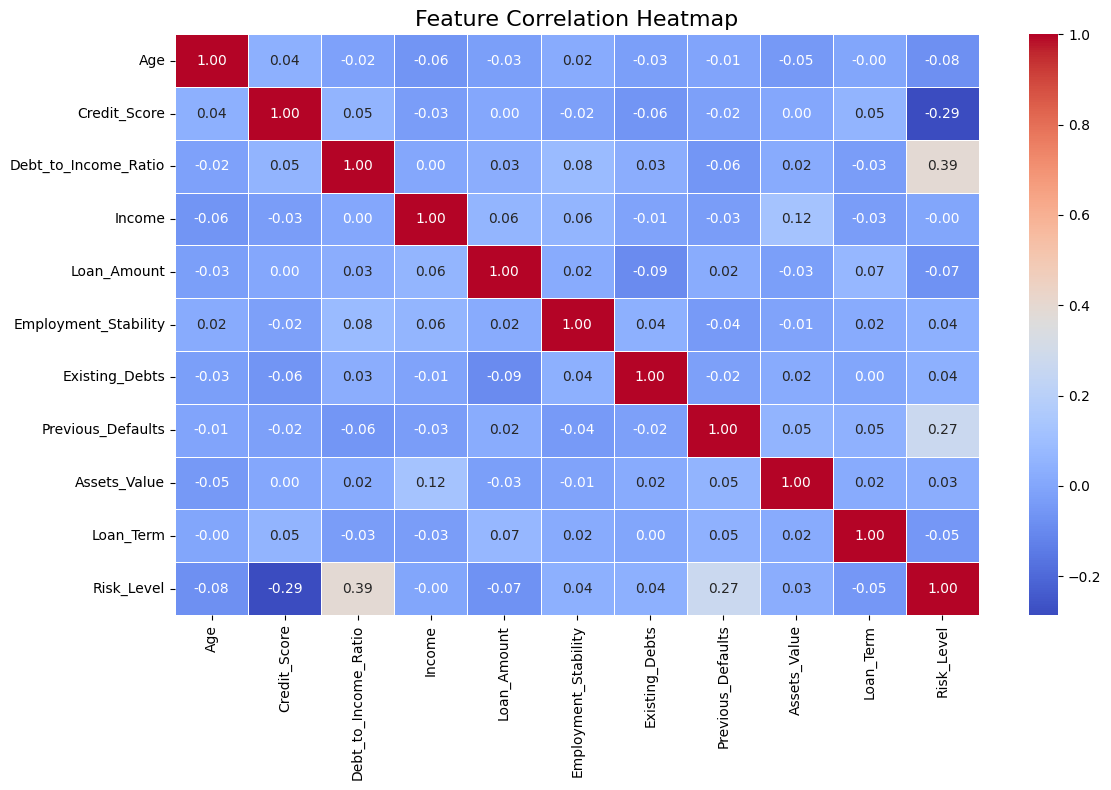

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and layout
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()
